In [1]:
#Load packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.dates import DateFormatter

from datetime import datetime

In [7]:
#Import data from same folder

data=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv',error_bad_lines=False)
datastate=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv',error_bad_lines=False)

In [3]:
nations=pd.read_csv('C://Users/plame/Downloads/County_AmericanNationsCode.csv')

In [4]:
nations['fips']=nations['FIPS']

In [5]:
nations.head()

,NAME,STATE_NAME,FIPS,AN_KEY,AN_TITLE,fips
0,Lake of the Woods,Minnesota,27077,YK,Yankeedom,27077
1,Ferry,Washington,53019,FW,Far West,53019
2,Stevens,Washington,53065,FW,Far West,53065
3,Okanogan,Washington,53047,FW,Far West,53047
4,Pend Oreille,Washington,53051,FW,Far West,53051


In [8]:
df=pd.merge(data, nations, on="fips")

In [9]:
df=df.drop(columns=['county','state','fips','NAME','STATE_NAME','FIPS','AN_KEY'])

In [10]:
df=df.pivot_table(index='date',columns='AN_TITLE',aggfunc=sum)

In [16]:
key=[['Deep South','El Norte','Far West','Federal Entity','First Nation'],['Greater Appalachia','Greater Polynesia','Left Coast','Midlands','New France'],['New Netherland','Spanish Caribbean','Tidewater','Yankeedom','Yankeedom']]

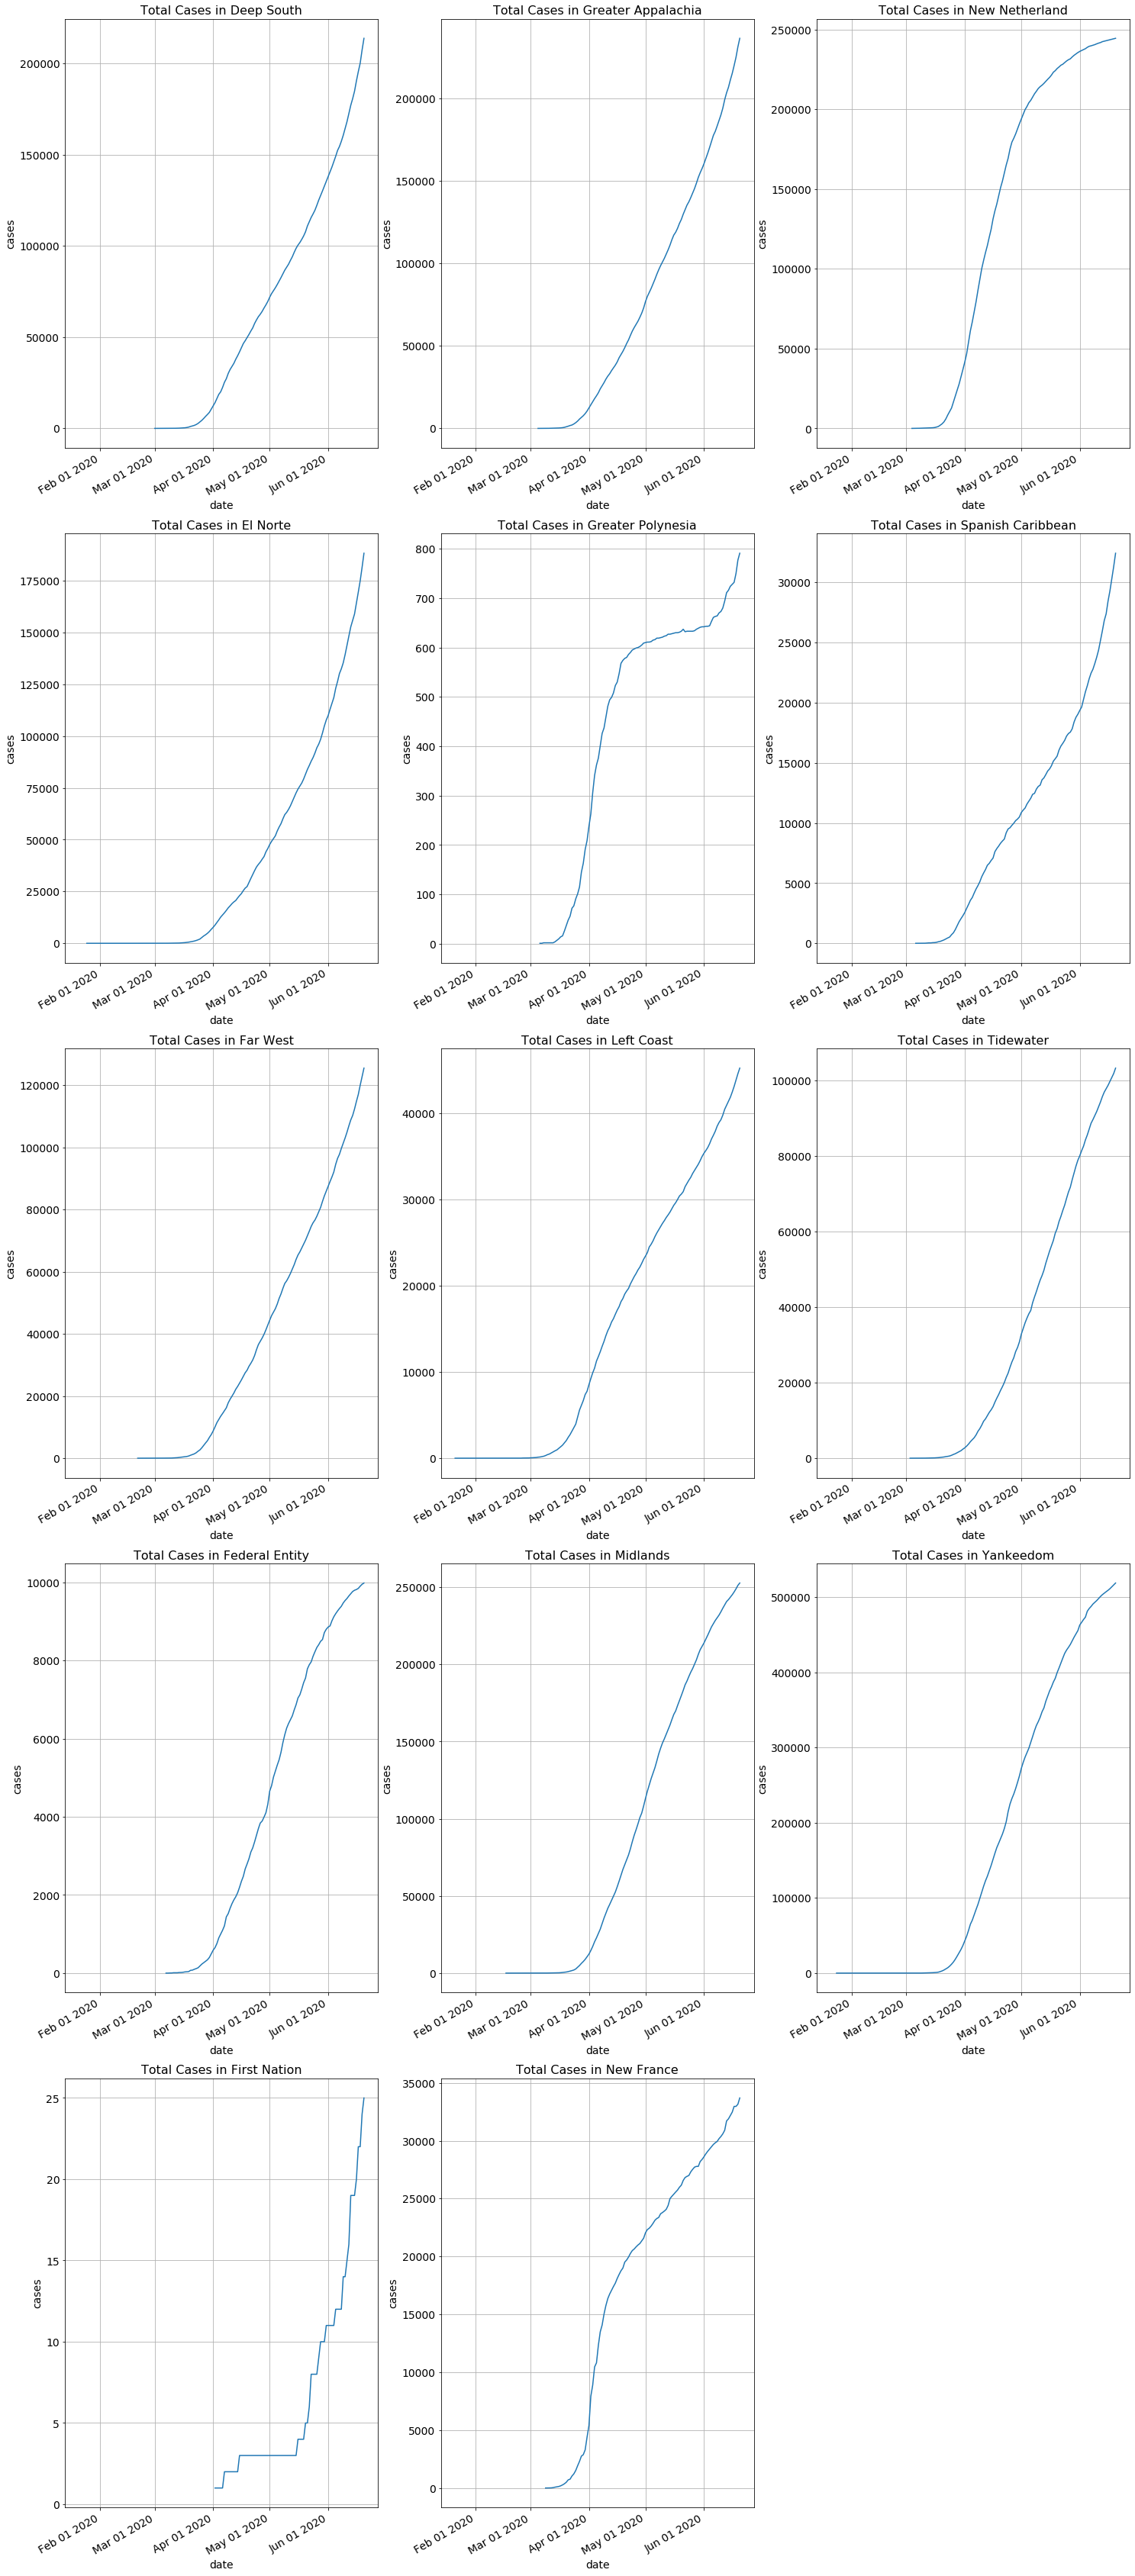

In [21]:
fig,ax = plt.subplots(5,3,figsize=(25,60),sharex=True)

for i in range(5):
    for j in range(3):
        ax[i,j].grid(axis='both')
        ax[i,j].set_xlabel('date',fontsize=14)
        ax[i,j].set_ylabel('cases',fontsize=14)

        ax[i,j].set_title('Total Cases in '+key[j][i],fontsize=16)
        
        formatter = DateFormatter('%b %d %Y')
        ax[i,j].xaxis.set_major_formatter(formatter)
        
        ax[i,j].plot(pd.to_datetime(df.index),df[('cases', key[j][i])])
                
        ax[i,j].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True,labelsize=14)
        ax[i,j].tick_params(axis='y',labelsize=14)
        
        for label in ax[i,j].get_xticklabels():
            label.set_ha("right")
            label.set_rotation(30)
        
for a in fig.axes:
    a.tick_params(
    axis='x',        
    which='both', 
    bottom=True,
    top=False,
    labelbottom=True)   

ax[4,2].set_visible(False)

plt.show()

In [282]:
fig.savefig('AmericanNations_cases_20200621_sharey.png')